In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
v = np.array([[1,2,3]]).T
w = np.array([[10,20]])

v+w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

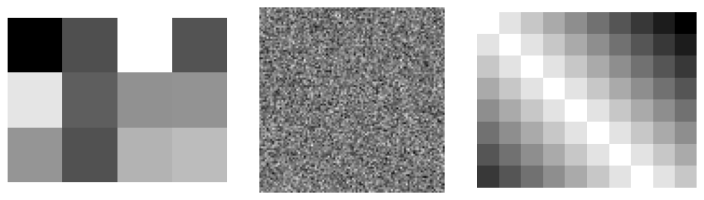

In [3]:
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8), np.arange(10)) #토플리츠 행렬(첫번째 인수(행), 두번째 인수(열) 이용해 대각선이 일정한 패턴을 갖는 행렬)
    # 부호를 반대로 설정하여 대각선이 흰색이 되도록 설정(- 없으면 대각선이 검정색)

fig, axs = plt.subplots(1,3, figsize=(10,3))

axs[0].imshow(A, cmap='gray')
axs[1].imshow(B, cmap='gray')
axs[2].imshow(C, cmap='gray')

for i in range(3) : axs[i].axis('off') #축 제거

plt.tight_layout() # 그래프 간 간격을 자동으로 조정
plt.savefig('Figure_04_01.png', dpi=600)
plt.show()

# Slicing out rows and columns

In [4]:
A = np.reshape(np.arange(1,10), (3,3)) # 1~10까지의 1차원 정수 배열을 3*3 행렬로 변환

print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
print(A[1,:])

print(A[1])

[4 5 6]
[4 5 6]


In [6]:
print(A[:,1])

[2 5 8]


In [7]:
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [8]:
print(A[0:2, 1:2])


[[2]
 [5]]


In [9]:
print(A[0:2:1, 0:2:1]) #[start : stop : step] = [시작 : 종료 : 간격]

[[1 2]
 [4 5]]


In [10]:
A = np.arange(60).reshape(6,10)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [11]:
sub = A[1:4:1 , 0:5:1]

sub

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

# Some special matrices

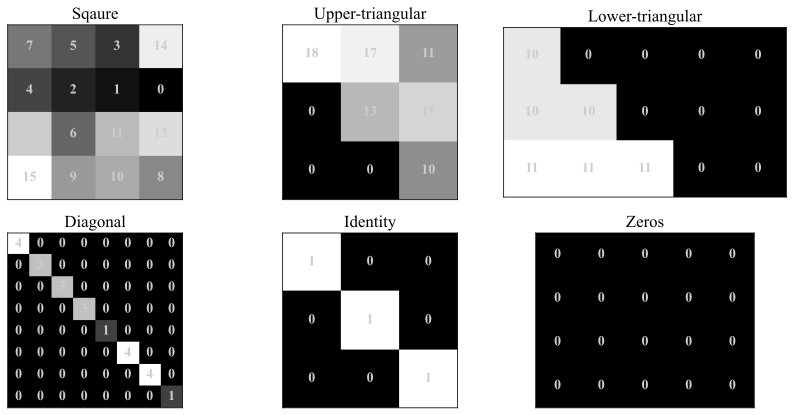

In [12]:
#square
M1 = np.random.permutation(16).reshape(4,4)

#upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

#lower-triangular square
M3 = np.tril(np.random.randint(8,16, (3,5)))

#diagonal
M4 = np.diag(np.random.randint(0,6, size=8)) #8*8

#ientity
M5 = np.eye(3,dtype=int)

#zeros
M6 = np.zeros((4,5), dtype=int)

matrices = [M1, M2, M3, M4, M5, M6]
matLabels = ['Sqaure', 'Upper-triangular', 'Lower-triangular', 'Diagonal', 'Identity', 'Zeros']

_, axs = plt.subplots(2,3, figsize=(12,6)) # _ : figure 객체(전체 그림 조작할 때 필요)를 무시하고 가져오지 않겠다는 의미(axs(개별 서브플롯 조작할 때 필요)만 사용함)
axs = axs.flatten()

for mi, M in enumerate(matrices): #mi : matrix index, M : matrix
    axs[mi].imshow(M, cmap='gray', origin='upper', vmin=np.min(M), vmax=np.max(M)) #origin='upper' = (0,0)위치가 이미지의 왼쪽 위에 오도록 설정, vmin&vmax = 행렬의 최소값과 최대값을 기준으로 명암조정

    axs[mi].set(xticks=[], yticks=[]) # 축제목 제거
    axs[mi].set_title(matLabels[mi])

    for (j,i), num in np.ndenumerate(M): #행렬의 각 요소에 대해 좌표 (j,i), num을 반환(다차원 배열을 인덱스와 값으로 순회)
        axs[mi].text(i,j,num,color=[.8,.8,.8], ha='center', va='center', fontweight='bold')

plt.savefig('Figure_04_02.png', dpi=600)
plt.tight_layout()
plt.show()


# Some more details about special matrices

In [13]:
# matrix size parameters

Mrows = 4
Ncols = 6

A = np.random.randn(Mrows, Ncols)

np.round(A,3)

array([[ 1.522, -0.235,  0.533,  0.699, -0.314,  1.115],
       [-1.632, -0.226, -0.513, -0.084, -0.295,  1.748],
       [ 2.017,  1.15 , -0.584, -0.932, -1.006, -0.036],
       [-0.439,  0.014, -0.296, -0.344, -0.055, -0.581]])

In [14]:
# Extract the triangular part of a dense matrix

M = 4
N = 6

A = np.random.randn(M,N)

print('Upper triangular:\n')
print(np.triu(A))

print('Lower triangular:\n')
print(np.tril(A))

Upper triangular:

[[-1.35837834  0.82061208  0.96658935 -0.45689868  1.37814478 -1.02482476]
 [ 0.         -0.80465592  1.03953563  1.31821175  1.86373006 -2.05598273]
 [ 0.          0.         -1.25332014 -1.91468201 -0.40757864  0.0414526 ]
 [ 0.          0.          0.         -0.43572545 -0.3341047   1.17088416]]
Lower triangular:

[[-1.35837834  0.          0.          0.          0.          0.        ]
 [-0.53301437 -0.80465592  0.          0.          0.          0.        ]
 [ 0.19260055  0.55331375 -1.25332014  0.          0.          0.        ]
 [ 0.8589094   1.76111462 -1.39123952 -0.43572545  0.          0.        ]]


In [15]:
# Diagonal

A = np.random.randn(5,5)
d = np.diag(A)

print('Original :\n', A)
print('\n\nInput a matrix :\n', d)

# OR input a vector to create a diagonal matrix

v = np.arange(1,6)
D = np.diag(v)

print('\n\nInput vector :', v)
print('\n\nInput a vector :\n', D)

Original :
 [[-0.11797687  0.19867206  0.15096768  0.62670013  0.7087444 ]
 [-0.26793472 -1.008057   -1.24115156 -0.53338507 -0.1215392 ]
 [-1.46804915  0.76566234  0.86481519 -0.92075649 -0.10603628]
 [ 1.56113254 -0.50920984 -0.63397267 -0.71252151  0.38793437]
 [-0.60362089  1.50429052  0.07056811 -0.86541921 -0.20709964]]


Input a matrix :
 [-0.11797687 -1.008057    0.86481519 -0.71252151 -0.20709964]


Input vector : [1 2 3 4 5]


Input a vector :
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [16]:
# Identity matrices

n = 4
I = np.eye(n) #np.identity() 가 항상 정사각행렬을 만드는 반면 np.eye는 비정사각 행렬도 만들 수 있음(I와 발음 유사)

print(f'The {n}x{n} identity matix :\n', I)

The 4x4 identity matix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
#Zero matries

n = 4
m = 5
I = np.zeros((n,m))

print(f'The {n}x{m} zeros matrix :\n', I)

The 4x5 zeros matrix :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Matrix addition

In [18]:
A = np.array([ [2,3,4],
              [1,2,4]])

B = np.array(( [0,3,1],
              [-1,-4,2]))


print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]


## Shifting a matrix

In [19]:
3 + np.eye(2)

array([[4., 3.],
       [3., 4.]])

In [20]:
A = np.array([ [4,5,1],
              [0,1,11],
              [4,9,7]])

s = 6

print('Original matrix : ')
print(A), print('  ')

print('Broadcasting addition : ')
print(A+s), print('   ')

print('Shifting : ') #행렬의 대각선 요소를 특정 값으로 이동(변경)
print(A + s*np.eye(len(A)))

Original matrix : 
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
Broadcasting addition : 
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
   
Shifting : 
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


## Scalar multiplication

In [21]:
print(A), print('  ')

print(s*A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


## Hadamard multiplication

In [22]:
A = np.random.randn(3,4)
B = np.random.randn(3,4)

print(A*B) #요소별 곱셈
print('\n\n')
print(np.multiply(A,B)) #요소별 곱셈
print('\n\n')
print(A@B) #행렬곱 -> 첫행렬의 열 개수와 두번째 행렬의 행의 개수가 같아야 가능

[[ 2.77533272 -0.41208948  1.76482237 -0.1317351 ]
 [ 1.70356256 -1.16205873 -0.55403195 -1.70773574]
 [ 0.40383751 -0.5466513  -0.34908157 -0.29496216]]



[[ 2.77533272 -0.41208948  1.76482237 -0.1317351 ]
 [ 1.70356256 -1.16205873 -0.55403195 -1.70773574]
 [ 0.40383751 -0.5466513  -0.34908157 -0.29496216]]





ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)